In [2]:
#@title Setup and Imports (Run this first)
import random
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
import IPython.display as ipd

html = ipd.display(ipd.HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/p814BapRq2U" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'))
html

/Users/mton/miniconda3/envs/torch-gpu/lib/python3.9/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


There's been a bit of an explosion of AI-generated art recently, with the advent  
of CLIP-guided text-to-image methods and a renewed interest in all things  
generative. Diving into the various communities, I quickly realised that  
although there are lots of folks using these methods, only a small subset feel  
confident enough with the code to modify the notebooks being shared around. 
 
This course aims to change that by equipping more coders and artists with the  
understanding and tools necessary to explore this space, creating new tools and  
getting to grips with existing ones.

The idea had been brewing for some time, but when I put out this tweet expecting  
one or two responses and ended up with more engagement than I'd ever seen before  
it became obvious that this needs to happen asap :)

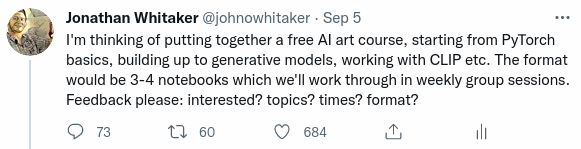

How was this `IMAGE` embedded ^? 

- ![Screenshot from 2021-09-12 09-08-09.png](data:image/png;base64 ... )

There's been a bit of an explosion of AI-generated art recently, with the advent  
of CLIP-guided text-to-image methods and a renewed interest in all things  
generative. Diving into the various communities, I quickly realised that  
although there are lots of folks using these methods, only a small subset feel  
confident enough with the code to modify the notebooks being shared around.  
This course aims to change that by equipping more coders and artists with the  
understanding and tools necessary to explore this space, creating new tools and  
getting to grips with existing ones.

The idea had been brewing for some time, but when I put out this tweet expecting  
 one or two responses and ended up with more engagement than I'd ever seen  
 before it became obvious that this needs to happen asap :)

We'll be using Discord to run the course and keep everything organised. If you  
haven't already, do join us there (https://discord.gg/P92X2pxC) to  
stay up-to-date on all things course-related. These notebooks are designed to  
work as standalone lessons, but you'll get much more value out of them if you  
join us in our weekly sessions (Sundays 4pm UTC) to work through the material  
together.

There will be four main lessons along with additional bonus notebooks. We'll  
start with Lesson #1 on September 19 and do one every week following that. The  
content for each lesson will hopefully be released at least a week before the  
live session. Links to the notebooks for each lesson will be included here as  
they become available:

- Lesson #1 (This one!): Intro to PyTorch and Optimizing via Gradient Descent
- Lesson #2: Learning Representations, ConvNets, Style Transfer and Auto-Encoders
- Lesson #3: GANs and CLIP
- Lesson #4: Going Further

# Navigating The Notebooks

![Navigating](https://c.tenor.com/CbhnRg0n7ksAAAAM/kermit-the-frog-looking-for-directions.gif)

We're cramming a lot into each lesson, but don't despair! A lot of the code will  
be illustrative examples which you can skim now and refer to later if you ever  
need to remind yourself about some specific function. 

Our goal is NOT to memorize everything, merely to get a high-level overview. I  
recommend collapsing sections as we complete them to make navigation easier, and  
if you get lost remember that you can see the table of contents in the panel on  
the left. 

Within each section there will be 
- Text explanations with code examples
- Video content (currently just part of the full run-through video linked at the top)
- Coding exercises to practice what you've learnt
- Discussion questions to talk through as a group, marked with **THINK/DISCUSS**

This is version one of this course, so there may be mistakes or concepts that  
are unclear. Please ask questions and share any feedback via Discord or directly  
during the live lessons.

The live lessons will be recorded (if participants are OK with that), so if  
you're working through this after we run the lesson there will be a video you  
can work along with linked here. 

At the start of each notebook, we'll have a setup section that imports some  
libraries that will give us access to functionality beyond that offered by  
Python's standard library. If you haven't already run it, scroll up to the  
start of this notebook and run the cell so that you're ready to view the videos  
and dive into the code. You'll notice the code is hidden - click 'show code' to  
see what's going on. Throughout these notebooks we'll hide code to keep things  
tidy, but you can always take a peek under the hood to see what's going on. 

# Section 1: Pytorch and Tensors

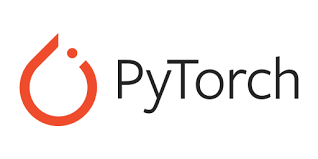

PyTorch is primarily a deep learning framework. It has been designed to make  
creating and working with deep neural networks as easy, fast and flexible as  
possible. Today we'll look at one of the core components that makes this  
possible: tensors. We'll start by looking at how to contruct and manipulate  
tensors, and then we'll explore the magic of autograd and how we can use it for  
optimization with gradient descent. 

Video:
- What is PyTorch?
- Creating tensors
- Modifying them
- Debugging tips
- Images as tensors

A lot of the material for this lessson was taken from the excellent content  
over at https://deeplearning.neuromatch.io/tutorials/W1D1_BasicsAndPytorch/student/W1D1_Tutorial1.html

## 1.1 Creating Tensors

![tensor lesson 1](https://i.imgflip.com/5moxki.jpg)

We can construct a tensor directly from some common python iterables, such as  
list and tuple. Nested iterables can also be handled as long as the dimensions  
make sense.

In [22]:
import torch
import numpy as np

# tensor from a list
a = torch.tensor([0, 1, 2])

# tensor from a tuple of tuples
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)

# tensor from a numpy array
c = np.ones([2,3])
c = torch.tensor(c)

print(f'--[a]-- \n{a}')
print(f'--[b]-- \n{b}')
print(f'--[c]-- \n{c}')


--[a]-- 
tensor([0, 1, 2])
--[b]-- 
tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])
--[c]-- 
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [32]:
# The numerical arguments we pass to these constructors determine the shape of  
# the output tensor - try changing them and see what happens

x = torch.ones(2,3)
print(f'--[x]-- \n{x}')
y = torch.zeros(3,2)
print(f'--[y]-- \n{y}')
# empty just allocates memory, and is slightly faster at creating tensors
# values aren't guaranteed to be initialized to zero, and can be Nan ...etc
z = torch.empty(1,1,5)
print(f'--[z]-- # 1 row, 1 column, 5 z-depth \n{z}')

--[x]-- 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
--[y]-- 
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
--[z]-- # 1 row, 1 column, 5 z-depth 
tensor([[[0., 0., 0., 0., 0.]]])


**THINK/DISCUSS** : Explain the `DIFFERENCE` between random `UNIFORM` and `NORMAL` distribution

 Random `UNIFORM` distribution and `NORMAL` distribution are both types of  
 probability distributions used in probability theory and statistics to  
 describe the distribution of a random variable.

 - A random `UNIFORM` distribution is a distribution where all values within a  
   defined range are equally likely to occur. In other words, every possible  
   value within the range has the same probability of occurring. For example,  
   if we have a uniform distribution over the interval [0,1], any value in that  
   interval is `EQUALLY LIKELY` to occur.  
 - A `NORMAL` distribution, on the other hand, is a distribution that is  
   `BELL-SHAPED` and `SYMMETRICAL` around a `CENTRAL` value. The normal distribution  
   is characterized by two parameters: MEAN and STANDARD DEVIATION. The `MEAN`  
   represents the `CENTRAL` value around which the distribution is symmetrical,  
   and the `STANDARD` deviation represents the `SPREAD` or variability of the  
   distribution. In a `NORMAL` distribution, more values are `LIKELY` to occur near   
   the `MEAN` than at the `TAILS`, and the probabilities of the values decrease as  
   they move further from the mean.  
   
 To summarize, the key difference between a random uniform distribution and a  
 normal distribution is that the former has an equal probability of every value  
 within a specified range, while the latter is bell-shaped and has a higher  
 probability of values near the mean and lower probabilities of values further  
 away from the mean.

In [105]:
# constructors for random numbers

# @audit-ok ☑ : Explain the difference between randn and rand
# ANSWER 🔎 :
# In NumPy, rand and randn are both methods that can be used to generate random 
# numbers. The key differences between rand and randn are:
# - rand generates random numbers from a uniform distribution over the interval 
#   (0, 1), while randn generates random numbers from a standard normal 
#   distribution with mean 0 and standard deviation 1.
# - rand takes a tuple (or integers separated by commas) specifying the shape of 
#   the output array as an argument, while randn takes individual integers 
#   representing the dimensions of the output array.
# In summary, rand generates numbers from a uniform distribution and takes the 
# shape of the output array as a tuple argument, while randn generates numbers 
# from a normal distribution and takes the dimensions of the output array as 
# individual integer arguments.

# uniform distribution
a = torch.rand(1,3)
print(f'--[a]-- rand  => [uniform] \n{a}')

# normal distribution
b = torch.randn(3,4) # randn ... n == normal
print(f'--[b]-- randn => [normal] \n{b}')

--[a]-- rand  => [uniform] 
tensor([[0.6634, 0.3979, 0.5278]])
--[b]-- randn => [normal] 
tensor([[ 0.5655,  0.3584,  2.1016, -1.3182],
        [-1.4407,  1.6589, -1.2323, -1.2271],
        [ 0.8746, -0.7807,  0.7647, -0.1813]])


(array([ 9., 13.,  9.,  9.,  5.,  8.,  7., 12., 14., 14.]),
 array([0.02201086, 0.11884813, 0.2156854 , 0.31252265, 0.40935993,
        0.5061972 , 0.60303444, 0.6998717 , 0.796709  , 0.8935462 ,
        0.9903835 ], dtype=float32),
 <BarContainer object of 10 artists>)

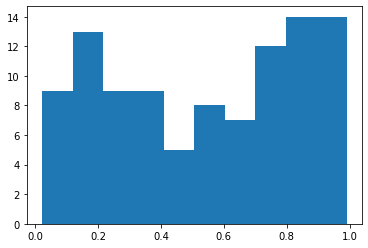

In [85]:
import matplotlib.pyplot as plt

# @audit 🖶 : plot a histogram of uniform distribution
uniform_plot = plt.hist(torch.rand(100))
uniform_plot

(array([  4.,   9.,  32.,  73., 108., 107., 101.,  45.,  12.,   9.]),
 array([-3.1660767 , -2.5710468 , -1.9760171 , -1.3809873 , -0.7859575 ,
        -0.19092774,  0.40410203,  0.9991318 ,  1.5941616 ,  2.1891913 ,
         2.7842212 ], dtype=float32),
 <BarContainer object of 10 artists>)

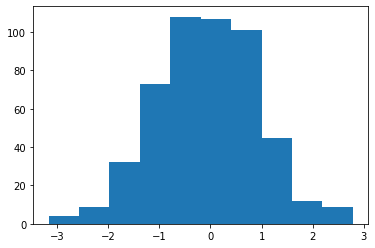

In [86]:
# @audit 🖶 : plot a histogram of normal distribution
normal_plot = plt.hist(torch.randn(500))
normal_plot

In [106]:
# construct NEW tensors with dimensions equal to EXISTING tensors
c = torch.zeros_like(a)
print(f'--[c]-- zeros_like(a) \n{c}\n')

d = torch.randn_like(b)
# @audit 🛑 : Explain why must be of tensor float else : "normal_kernel_cpu" not implemented for 'Long'
print(f'--[d]-- randn_like(b) \n{d}\n')


--[c]-- zeros_like(a) 
tensor([[0., 0., 0.]])

--[d]-- randn_like(b) 
tensor([[-0.7714, -0.7833, -0.4053, -0.1714],
        [ 0.7985,  0.8764,  0.2035,  1.1203],
        [ 1.4894, -0.9532, -1.1034,  0.2993]])



In [107]:
# Return evenly spaced values within a given interval.
a = torch.arange(0, 30, step=3)
print(f'--[a]-- # equivalent to np.arange(0, 30, step=3) \n{a}\n')

# np.linspace allows you to define how many values you get including the 
# specified min and max value. It infers the stepsize:
# Return evenly spaced numbers over a specified interval.
b = torch.linspace(0, 5, steps=11)
print(f'--[b]-- # equivalent to np.linspace(0, 5, steps=11) \n{b}\n')

--[a]-- # equivalent to np.arange(0, 30, step=3) 
tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

--[b]-- # equivalent to np.linspace(0, 5, steps=11) 
tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])



#### Coding Exercise 1 : Creating Tensors

Below you will find some incomplete code. Fill in the missing code to construct  
the specified tensors.  

We want the tensors:

`A` : 20 by 21 tensor consisting of ones  
`B` : a tensor with elements equal to the elements of numpy array Z  
`C` : a tensor with the same number of elements as A but with values ∼U(0,1)  
`D` : a 1D tensor containing the even numbers between 4 and 40 inclusive.  

In [188]:
# The numpy array required for B
Z = np.vander([1,2,3], 4)

A = torch.ones(20, 21)
print(f'20 by 21 tensor of ones => [A = {A.shape}]')

B = torch.tensor(Z)
print(f'[B = {B.shape}] with elements equal to elements of [Z = {Z.shape}]')

# The notation "∼U(0,1)" typically refers to a random variable that is UNIFORMLY 
# distributed between 0 and 1
C = torch.rand_like(A)
print(f'tensor same shape as [A], but UNIFORM random values between 0 and 1\n--[C]--\n{C}\n')

D = torch.arange(4, 41, step=2) # to be inclusive of 40, we need end=41 (40+1)
print(f'1D tensor of even numbers from 4 to 40 inclusive => [D]\n{D}')
# 

20 by 21 tensor of ones => [A = torch.Size([20, 21])]
[B = torch.Size([3, 4])] with elements equal to elements of [Z = (3, 4)]
tensor same shape as [A], but UNIFORM random values between 0 and 1
--[C]--
tensor([[2.9998e-02, 9.1884e-01, 9.8820e-01, 3.6230e-01, 8.2834e-02, 6.3005e-01,
         9.5247e-01, 6.7984e-02, 6.5256e-01, 9.7729e-01, 6.6674e-01, 6.2476e-01,
         6.5395e-01, 4.1543e-01, 7.1319e-01, 9.9551e-01, 3.2867e-01, 3.8970e-02,
         9.8498e-01, 2.4048e-01, 5.4636e-01],
        [7.3894e-01, 9.0073e-01, 9.8941e-02, 1.6161e-01, 3.1372e-01, 4.7992e-01,
         8.1472e-02, 2.3431e-01, 2.9640e-01, 3.7093e-02, 2.3923e-01, 3.0525e-01,
         5.6593e-01, 7.7166e-01, 2.5792e-01, 3.3116e-01, 1.7133e-01, 2.7700e-01,
         2.8203e-01, 5.3588e-01, 2.9605e-01],
        [1.1232e-01, 5.2142e-01, 9.9961e-01, 9.2133e-01, 9.0335e-01, 9.6977e-01,
         1.8755e-01, 6.8965e-01, 3.5129e-01, 8.9246e-01, 2.6118e-01, 6.9413e-01,
         8.2128e-01, 6.9413e-01, 6.2506e-01, 2.2768e-01, 

## 1.2 Tensor Operations

![tensor operations](https://thumbs.gfycat.com/ElementaryDimpledBeardedcollie-max-1mb.gif)

We can perform operations on tensors using methods under `torch.`. However, in  
PyTorch most common Python operators are overridden, so we can use those  
instead. The `common standard arithmetic operators (+, -, \*, /, and **)` have   
all been `lifted to elementwise operations`.

In [130]:
x = torch.tensor([1,2,4,8])
y = torch.tensor([1,2,3,4])
print(f'[ADD] torch.add(x,y) = {torch.add(x,y)}')
print(f'[ADD]          x + y = {x + y} # element-wise addition')

print(f'SCRATCHPAD for other ELEMENT-WISE operations : ')
# @audit 🛑 : Explain what is x^y?  it's NOT exponentiation
x+y, x-y, x*y, x/y, x**y, x^y # the ** operator is exponentiation

[ADD] torch.add(x,y) = tensor([ 2,  4,  7, 12])
[ADD]          x + y = tensor([ 2,  4,  7, 12]) # element-wise addition
SCRATCHPAD for other ELEMENT-WISE operations : 


(tensor([ 2,  4,  7, 12]),
 tensor([0, 0, 1, 4]),
 tensor([ 1,  4, 12, 32]),
 tensor([1.0000, 1.0000, 1.3333, 2.0000]),
 tensor([   1,    4,   64, 4096]),
 tensor([ 0,  0,  7, 12]))

**THINK/DISCUSS:** What does element-wise mean, inspect the outputs above and discuss

ANSWER : `ELEMENT-WISE` operations is an operation performed `INDIVIDUALLY` on   
each `ELEMENT` of an set/array/matrix rather than the `ENTIRE` set/array/matrix  
as a `WHOLE`

Tensors also have many built-in methods such as .mean() or .sum()  
(see the full list here: https://pytorch.org/docs/stable/tensors.html).  
Whenever you're working with a multi-dimensional tensor, pay attention  
to the dimensions and think about what result you're aiming to achieve.

In [140]:
x = torch.rand(3,3)
print(f'--[x]-- \n{x}\n')
# sum() - note the axis is the axis your move across when summing
print(f'[SUM] of every element : x.sum()       => {x.sum()}')
print(f'[SUM] of the columns   : x.sum(axis=0) => {x.sum(axis=0)}') # type: ignore
print(f'[SUM] of the rows      : x.sum(axis=1) => {x.sum(axis=1)}') # type: ignore

--[x]-- 
tensor([[0.4559, 0.7437, 0.1255],
        [0.0454, 0.4906, 0.5777],
        [0.6254, 0.9442, 0.3042]])

[SUM] of every element : x.sum()       => 4.31257963180542
[SUM] of the columns   : x.sum(axis=0) => tensor([1.1267, 2.1785, 1.0074])
[SUM] of the rows      : x.sum(axis=1) => tensor([1.3251, 1.1137, 1.8738])


#### Coding Exercise 2
1) Display the means of each column in x
2) Make a new tensor `x_squared` which is x but every element has been raised to  
the power of 2
3) Find the sum of all elements in `x_squared`

In [147]:
x_column_means = x.mean(axis=0) # type: ignore
print(f'(1) [MEAN] of every column : x.mean(axis=0)   => {x_column_means}')

x_squared = torch.tensor(x)**2
print(f'(2) [SQUARED] new tensor : torch.tensor(x)**2 => \n{x_squared}')

x_squared_sum = x_squared.sum()
print(f'(3) [SUM] of every element : x_squared.sum() => {x_squared_sum}')


(1) [MEAN] of every column : x.mean(axis=0)   => tensor([0.3756, 0.7262, 0.3358])
(2) [SQUARED] new tensor : torch.tensor(x)**2 => 
tensor([[0.2079, 0.5531, 0.0157],
        [0.0021, 0.2407, 0.3338],
        [0.3911, 0.8916, 0.0925]])
(3) [SUM] of every element : x_squared.sum() => 2.7284116744995117


<ipython-input-147-a3f44f1ba324>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_squared = torch.tensor(x)**2


By `DEFAULT`, operations are `ELEMENT-WISE` ... but what if want the `MATRIX`  
operations?

Here's how:

1) `MATRIX MULTIPLICATION` : supported via `torch.matmul()` or the `@` symbol
2) `DOT MULTIPLICATION`    : supported via `torch.dot()  
// No, dot multiplication is not the same as dot product. Dot multiplication is  
not a well-defined operation and does not have a standard definition in  
mathematics. In contrast, dot product, also known as scalar product, is a  
specific mathematical operation that takes two equal-length sequences of  
numbers [1], usually coordinate vectors, and returns a scalar value. The dot  
product is defined as the sum of the products of the corresponding entries in  
the two vectors. It is an important concept in linear algebra and is often used  
in a variety of mathematical and scientific fields.  
// @audit 🛑 ... is this true?
3) `2D TENSOR TRANSPOSES`  : supported via `torch.t()` or `Tensor.T`  
// Note the lack of `Tensor.T` - it is an attribute, not a method

In [179]:
# Create a few tensors and try some of these solutions
transpose_2d = torch.rand(3,5)
print(f'--[transpose_2d init]-- \n{transpose_2d}\n')
print(f'--[transpose_2d transposed]-- \n{transpose_2d.t()}\n')

transpose_1d = torch.rand(5)
print(f'--[transpose_1d init]-- \n{transpose_1d}\n')
print(f'--[transpose_1d transposed]-- (does not work because !2D) \n{transpose_1d.t()}\n')

transpose_3d = torch.rand(2,3,5)
print(f'--[transpose_3d init]-- \n{transpose_3d}\n')
# errors out because > 2D
# t() expects a tensor with <= 2 dimensions, but self is 3D
# print(f'--[transpose_3d transposed]-- \n{transpose_3d.t()}\n')

# @audit 🛑 : Understand if dot product is the same as shader normal and light direction
ray_A = torch.tensor([0.0,1.0,0.0]) # y-axis
ray_B = torch.tensor([1.0,0.0,0.0]) # x-axis
ray_C = torch.tensor([0.5,0.5,0.0]) # 45°
ray_D = torch.tensor([0.5,0.0,0.5]) # 90°
ray_A.dot(ray_B)
ray_A.dot(ray_C)
ray_C.dot(ray_D)

--[transpose_2d init]-- 
tensor([[0.2438, 0.5490, 0.9276, 0.6331, 0.0828],
        [0.8358, 0.7554, 0.2274, 0.2831, 0.2605],
        [0.3505, 0.6449, 0.8632, 0.9883, 0.3067]])

--[transpose_2d transposed]-- 
tensor([[0.2438, 0.8358, 0.3505],
        [0.5490, 0.7554, 0.6449],
        [0.9276, 0.2274, 0.8632],
        [0.6331, 0.2831, 0.9883],
        [0.0828, 0.2605, 0.3067]])

--[transpose_1d init]-- 
tensor([0.9354, 0.9837, 0.5423, 0.4485, 0.6346])

--[transpose_1d transposed]-- (does not work because !2D) 
tensor([0.9354, 0.9837, 0.5423, 0.4485, 0.6346])

--[transpose_3d init]-- 
tensor([[[0.0202, 0.3933, 0.6190, 0.8129, 0.5222],
         [0.1849, 0.7497, 0.8772, 0.2550, 0.0181],
         [0.9651, 0.1973, 0.8316, 0.1424, 0.9925]],

        [[0.4192, 0.9643, 0.0647, 0.7689, 0.8662],
         [0.1892, 0.7260, 0.4256, 0.6365, 0.6521],
         [0.9959, 0.9273, 0.7406, 0.2261, 0.6374]]])



tensor(0.2500)

## 1.3 Manipulating Tensors

Beyond mathematical operations, we often want to : 
* access specific items or sets of items in a tensor  
* perform operations like changing the shape of a tensor

Here are a few examples of some common tasks. These may feel simple if you're  
used to something like numpy, but it's worth making sure you know how to do these  
basic operations (or at least, you know where to find these examples again to  
refer to them!) since we'll use these a lot in the coming lessons.

In [187]:
# Indexing Tensors
x = torch.arange(0, 10)
print(f'x      => {x}')
print(f'x[-1]  => {x[-1]} # last element')
print(f'x[1:3] => {x[1:3]} # idx 1 up to BUT NOT INCLUDING index 3')
print(f'x[:-2] => {x[:-2]} # ALL elements up to BUT NOT INCLUDING the last 2')

x      => tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[-1]  => 9 # last element
x[1:3] => tensor([1, 2]) # idx 1 up to BUT NOT INCLUDING index 3
x[:-2] => tensor([0, 1, 2, 3, 4, 5, 6, 7]) # ALL elements up to BUT NOT INCLUDING the last 2


Reshaping works when the Tensors shapes are compatible : 
* (3,4) => (8,2) --  NO -- because not enough elements (12 != 16)
* (3,4) => (4,3) -- YES -- same elements (3*4 and 4*3 = 12)


In [207]:
# Reshaping
z = torch.arange(12).reshape(6,2)
print(f'-- [original]   z (6,2) --\n{z}')

#transpose
z = z.t()
print(f'-- [transposed] z (2,6) --\n{z}')

#2d => 1d : APPENDS row by row until it has a 1d array
z = z.flatten()
print(f'-- [flattened]  z (12,) --\n{z}')

# and back to 2d
z = z.reshape(3,4)
print(f'-- [reshaped]   z (3,4) --\n{z}')

-- [original]   z (6,2) --
tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])
-- [transposed] z (2,6) --
tensor([[ 0,  2,  4,  6,  8, 10],
        [ 1,  3,  5,  7,  9, 11]])
-- [flattened]  z (12,) --
tensor([ 0,  2,  4,  6,  8, 10,  1,  3,  5,  7,  9, 11])
-- [reshaped]   z (3,4) --
tensor([[ 0,  2,  4,  6],
        [ 8, 10,  1,  3],
        [ 5,  7,  9, 11]])


[torch.cat] is used to concatenate tensors  
Take note of these examples, and how the dimension specified affects the output


In [224]:
# Create tensors of the same shape
x = torch.arange(12, dtype=torch.float32).reshape(3,4)
print(f'--[x]-- \n{x}\n')
y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
print(f'--[y]-- \n{y}\n')

# Concatenate tensors along rows
cat_rows = torch.cat((x,y), dim=0) # dim=0 is the rows
print(f'-- [torch.cat((x,y), dim=0)] -- #rows \n--> [6,4] <-- (3,4) + (3,4)\n{cat_rows}\n')

# Concatenate tensors along columns
cat_columns = torch.cat((x,y), dim=1) # dim=1 is the columns
print(f'-- [torch.cat((x,y), dim=1)] -- #columns \n--> [3,8] <-- (3,4) + (3,4)\n{cat_columns}\n')

--[x]-- 
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

--[y]-- 
tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])

-- [torch.cat((x,y), dim=0)] -- #rows 
--> [6,4] <-- (3,4) + (3,4)
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

-- [torch.cat((x,y), dim=1)] -- #columns 
--> [3,8] <-- (3,4) + (3,4)
tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])

